# Possíveis insights a partir dos dados de consumo explorados

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

pd.set_option('display.float_format', lambda x: '%0f' % x)
sns.set_style("darkgrid")


df_energy_insights = pd.read_csv('../datasets/processed/energy_by_region.csv')
df_energy_insights.head()

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,data,dataStr
0,2004,1,Outros,40857,69617.000000,RN,Rio Grande do Norte,Nordeste,Brasil,2004-01-01,January/2004
1,2004,1,Outros,311650,937538.000000,SP,Sao Paulo,Sudeste,Brasil,2004-01-01,January/2004
2,2004,1,Outros,56881,67601.000000,MS,Mato Grosso do Sul,Centro-Oeste,Brasil,2004-01-01,January/2004
3,2004,1,Outros,226165,209380.000000,SC,Santa Catarina,Sul,Brasil,2004-01-01,January/2004
4,2004,1,Outros,70634,416128.000000,RJ,Rio de Janeiro,Sudeste,Brasil,2004-01-01,January/2004


In [28]:
df_energy_insights.describe()

,ano,mes,numero_consumidores,consumo
count,25920.000000,25920.000000,25920.000000,25920.000000
mean,2013.500000,6.500000,682303.377199,339170.896721
std,5.766393,3.452119,1839311.687366,603642.745612
min,2004.000000,1.000000,52.000000,354.000000
25%,2008.750000,3.750000,18956.500000,61545.500000
50%,2013.500000,6.500000,108174.500000,136754.500000
75%,2018.250000,9.250000,442412.000000,361651.750000
max,2023.000000,12.000000,19201264.000000,4849895.000000


In [29]:
df_energy_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  25920 non-null  int64  
 1   mes                  25920 non-null  int64  
 2   tipo_consumo         25920 non-null  object 
 3   numero_consumidores  25920 non-null  int64  
 4   consumo              25920 non-null  float64
 5   sigla                25920 non-null  object 
 6   estado               25920 non-null  object 
 7   regiao               25920 non-null  object 
 8   pais                 25920 non-null  object 
 9   data                 25920 non-null  object 
 10  dataStr              25920 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.2+ MB


In [30]:
df_energy_insights['data'] = pd.to_datetime(df_energy_insights['data'])
df_energy_insights.head()

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,data,dataStr
0,2004,1,Outros,40857,69617.000000,RN,Rio Grande do Norte,Nordeste,Brasil,2004-01-01,January/2004
1,2004,1,Outros,311650,937538.000000,SP,Sao Paulo,Sudeste,Brasil,2004-01-01,January/2004
2,2004,1,Outros,56881,67601.000000,MS,Mato Grosso do Sul,Centro-Oeste,Brasil,2004-01-01,January/2004
3,2004,1,Outros,226165,209380.000000,SC,Santa Catarina,Sul,Brasil,2004-01-01,January/2004
4,2004,1,Outros,70634,416128.000000,RJ,Rio de Janeiro,Sudeste,Brasil,2004-01-01,January/2004


1. Média de consumo elétrico para o estado de Minas Gerais para o tipo  de consumo residencial entre todos os anos: 

In [31]:
mg_filter = ((df_energy_insights['sigla'] == 'MG') & (df_energy_insights['tipo_consumo'] == 'Residencial'))
average = df_energy_insights[mg_filter]['consumo'].mean()
print(f'A média mensal de consumo residencial em Minas Gerais entre os anos de 2004 e 2023 é de {average:.2f}')

A média mensal de consumo residencial em Minas Gerais entre os anos de 2004 e 2023 é de 824152.16


2. O estado que apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019: 

In [32]:
industrial_2019_filter = ((df_energy_insights['ano'] == 2019) & (df_energy_insights['tipo_consumo'] == 'Industrial'))
industrial_2019_data = df_energy_insights[industrial_2019_filter][['sigla', 'consumo']].groupby('sigla')['consumo'].sum().sort_values()
industrial_2019_data

sigla
RR      22761.000000
AC      37317.000000
AP     106093.000000
PI     207937.000000
TO     324424.000000
RO     455359.000000
DF     522325.000000
AL    1019567.000000
SE    1083331.000000
RN    1201375.000000
MS    1351533.000000
PB    1441192.000000
MA    1548457.000000
AM    1653878.000000
MT    2172884.000000
CE    2503873.000000
PE    3718810.000000
ES    4007124.000000
GO    5623584.000000
RJ    8008455.000000
BA    9229888.000000
RS    9766562.000000
SC   10613883.000000
PA   10792266.000000
PR   12882931.000000
MG   29769624.000000
SP   47635621.000000
Name: consumo, dtype: float64

<Axes: title={'center': 'Consumo Industrial em 2019'}, xlabel='sigla', ylabel='consumo'>

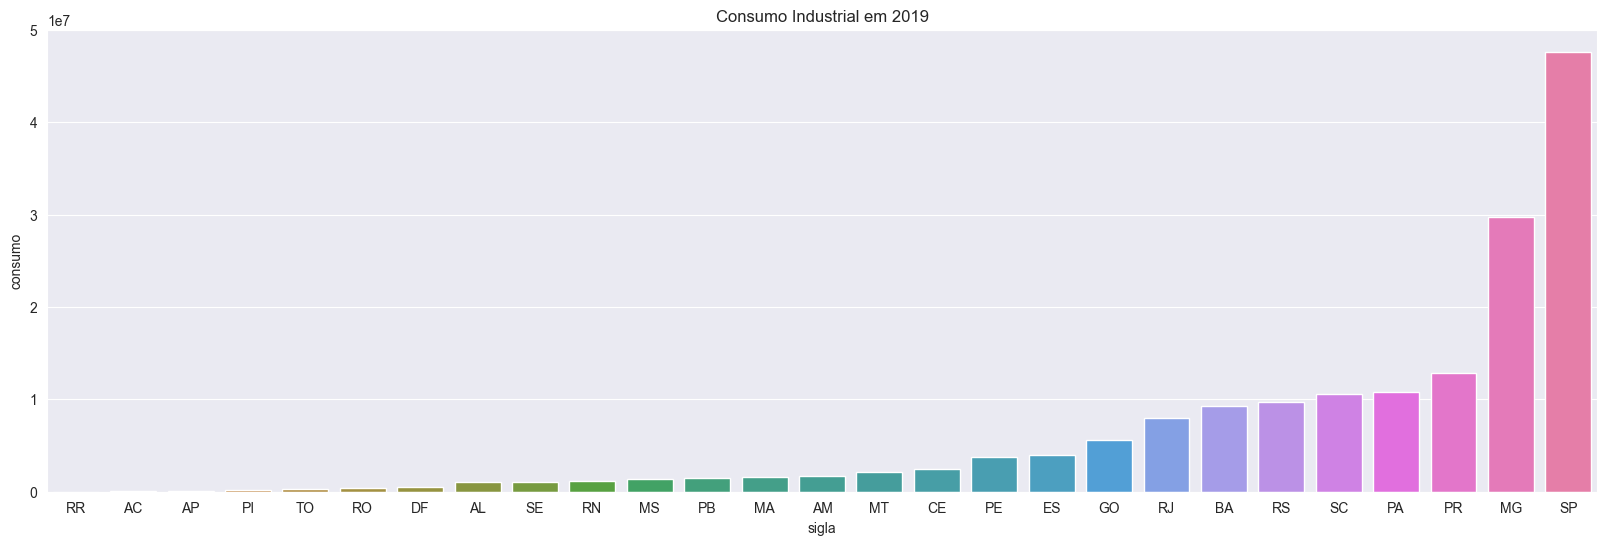

In [33]:
import src.utils_graphic as util
plt.figure(figsize=(20,6))
plt.title('Consumo Industrial em 2019')
plt.grid(True)
sns.barplot(data=industrial_2019_data.to_frame(), x='sigla', y='consumo', hue='sigla')


Com base na interpretação do grafico gerado é possível concluir que o estado que apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019 é São Paulo

In [34]:
energy_by_year = df_energy_insights.groupby(['ano']).agg(
    consumo = ('consumo', 'sum')
).reset_index()

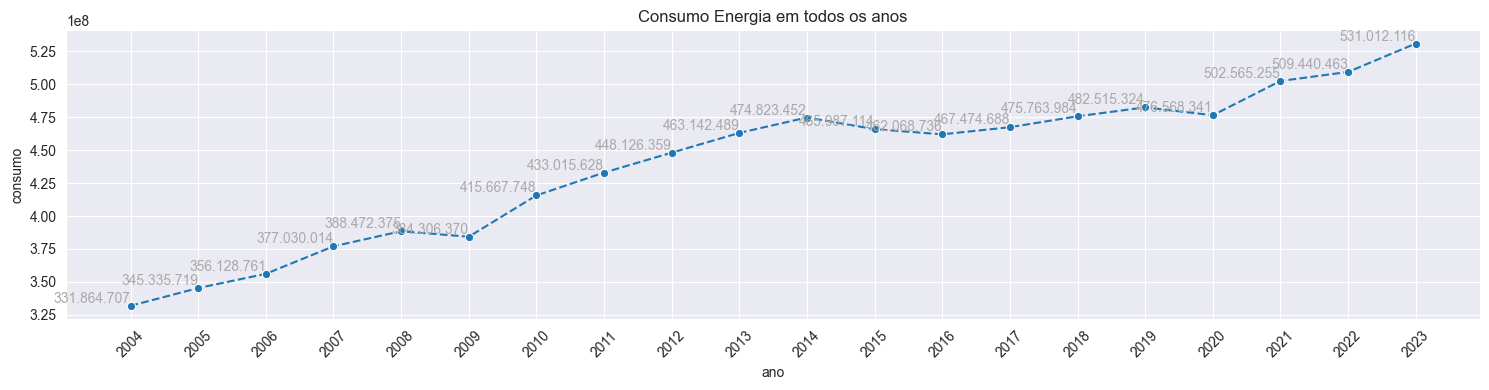

In [35]:
plt.figure(figsize=(15,4))
plt.title('Consumo Energia em todos os anos')
plt.xticks(ticks=energy_by_year['ano'], rotation=45)

axLine = sns.lineplot(data=energy_by_year, x='ano', y='consumo', marker='o', linestyle='--')
util.add_mark_to_line(ax=axLine, color='#AAA')

plt.tight_layout()
plt.show()

De acordo com grafico acima que mostra o consumo de energia ao longo dos anos, o ano com maior consumo é o ano de 2023 com 531.012.116 de consumo

In [36]:
energy_use_2020_filter = ((df_energy_insights['ano'] == 2020))
energy_use_2020_data = df_energy_insights[energy_use_2020_filter][['estado', 'consumo']].groupby('estado')['consumo'].sum().sort_values()


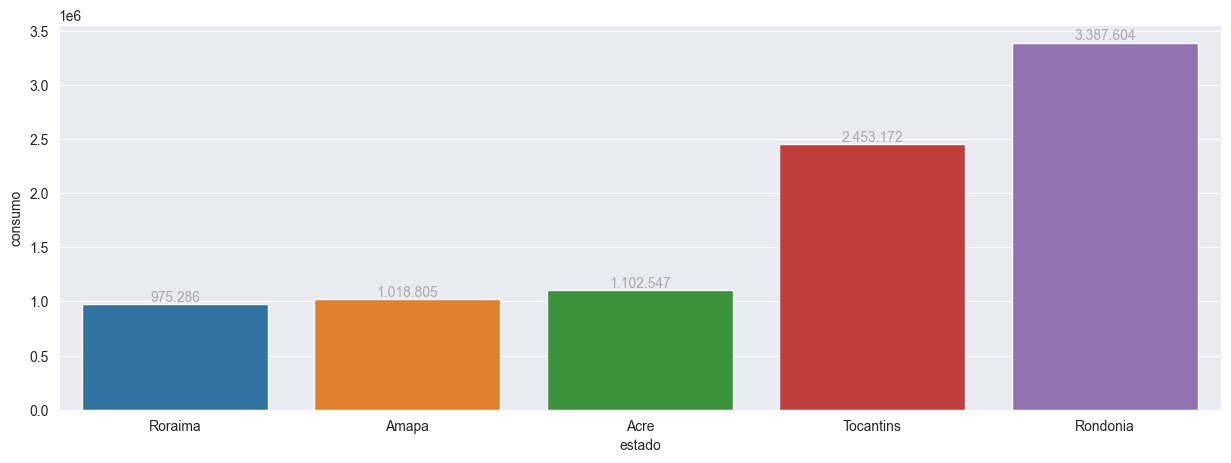

In [37]:
plt.figure(figsize=(15,5))
axBar = sns.barplot(data=energy_use_2020_data[:5].to_frame(), x='estado', y='consumo', hue='estado')
util.add_mark_to_bar(axBar, '#AAA')
plt.show()

De acordo com o gráfico acima, que exibe os cinco estados com o menor consumo de energia no Brasil em 2020, o estado de Roraima apresentou o menor consumo entre todos

In [38]:
use_energy_sp = df_energy_insights[df_energy_insights['sigla'] == 'SP']['consumo'].sum()
use_energy_no_sp = df_energy_insights[df_energy_insights['sigla'] != 'SP']['consumo'].sum()
df_use_energy = [use_energy_sp, use_energy_no_sp]
labels_comparative = ['São Paulo', 'Outros Estados']

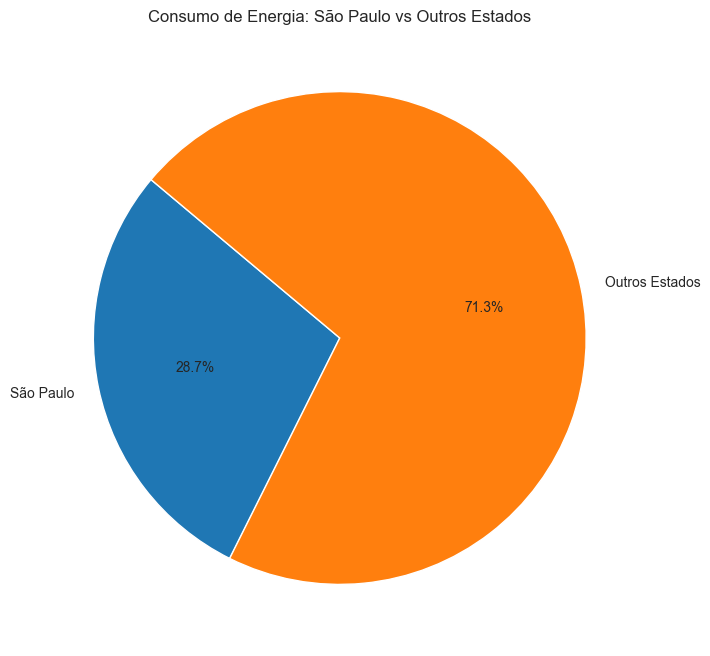

In [39]:
plt.figure(figsize=(8,8))
plt.pie(df_use_energy, labels=labels_comparative, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Consumo de Energia: São Paulo vs Outros Estados')

plt.show()

Este gráfico compara o consumo de energia de São Paulo com o consumo total dos demais estados, evidenciando que São Paulo sozinho é responsável por quase 30% do consumo de energia no país

In [51]:
use_energy_sp = df_energy_insights[df_energy_insights['sigla'] == 'SP'].groupby('ano')['consumo'].sum().reset_index()
use_energy_no_sp = df_energy_insights[df_energy_insights['sigla'] != 'SP'].groupby('ano')['consumo'].sum().reset_index()
use_energy_no_sp['grupo'] = 'Outros Estados'
use_energy_sp['grupo'] = 'São Paulo'
df_use_energy = pd.concat([use_energy_sp, use_energy_no_sp])


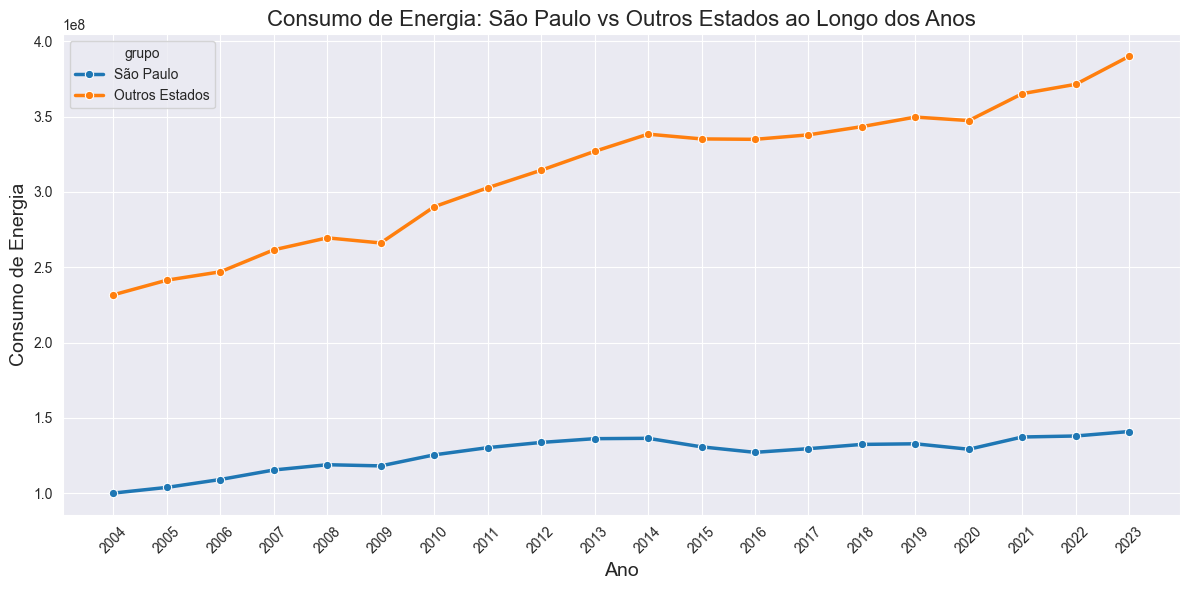

In [58]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_use_energy, x='ano', y='consumo', hue='grupo', marker='o', linewidth=2.5)
plt.xticks(ticks=energy_by_year['ano'], rotation=45)

plt.title('Consumo de Energia: São Paulo vs Outros Estados ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Consumo de Energia', fontsize=14)

plt.tight_layout()
plt.show()

Neste gráfico, que mostra o consumo de energia ao longo dos anos para São Paulo e os demais estados, é possível observar que o consumo dos outros estados aumentou significativamente com o passar dos anos, enquanto o consumo de São Paulo permaneceu relativamente estável.